In [1]:
# First we have to import appropiate packges to do the analysis 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# The next step is to get the data 

In [2]:
customers = pd.read_csv('Ecommerce Customers')

In [5]:
# The head of the data along with the info and description is checked 

In [6]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [7]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


In [8]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [1]:
# Some exploratory analysis using the seaborn method
# Joint plot between time on website and Lenght of Membership

In [4]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

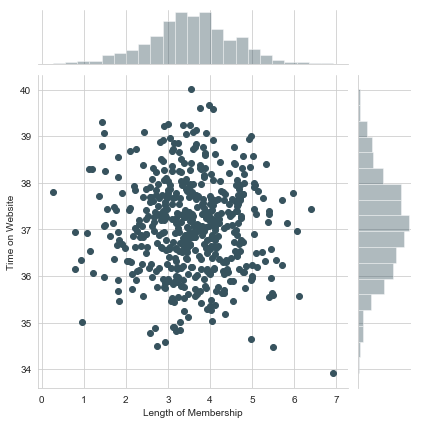

In [16]:
sns.jointplot(x='Length of Membership',y='Time on Website',data=customers)

In [8]:
# No disntict effect was observed 

In [9]:
# Lenght of member vs Average Session lenght 

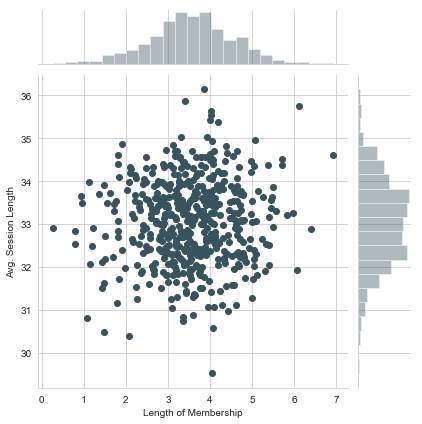

In [17]:
sns.jointplot(x='Length of Membership',y='Avg. Session Length',data=customers)

In [11]:
# Similar plot was observed as above

In [12]:
# Now , If we want to know whether Lenght of membership has any effect on Yearly amount spent , What we would observe 

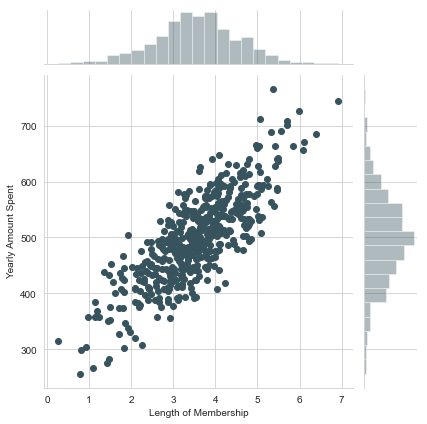

In [14]:
sns.jointplot(x='Length of Membership',y='Yearly Amount Spent',data=customers)

In [15]:
# By the curve we can say that yearly amount spent incerease with lenght of membership

In [18]:
# Now let us observe all the parameters of the data, Which is the important factor that determine Yearly amount spent 

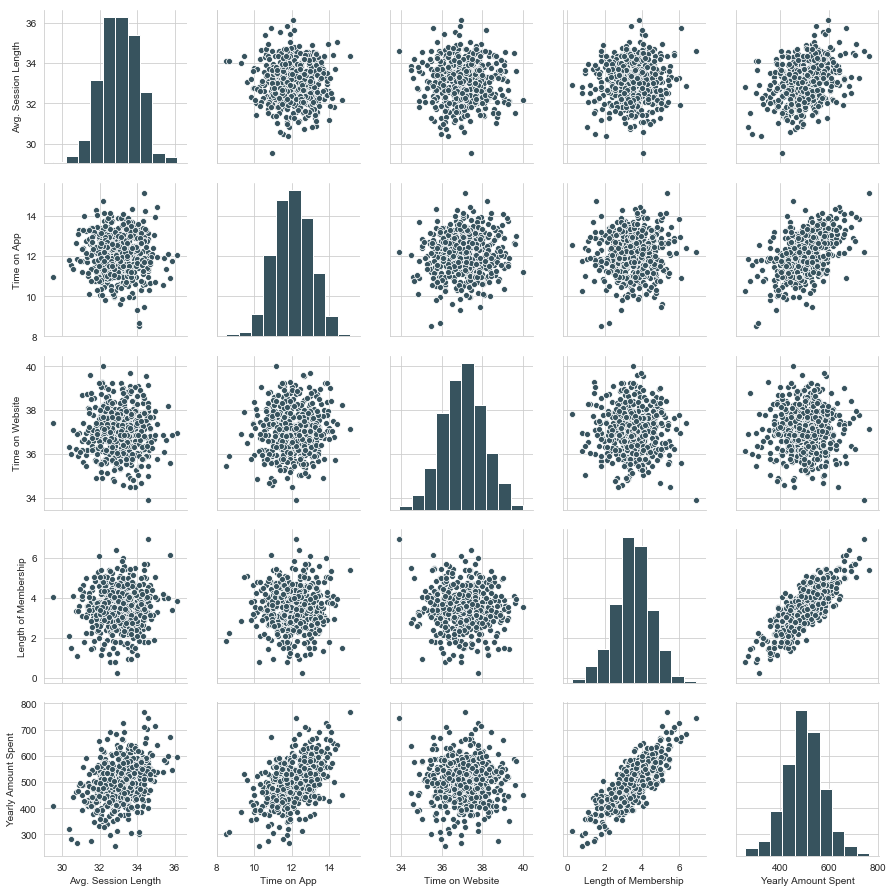

In [19]:
sns.pairplot(customers)

In [20]:
# The most important factor is lenght of membership. 

In [21]:
# Create a linear model plot (using seaborn's lmplot) of Yearly Amount Spent vs. Length of Membership

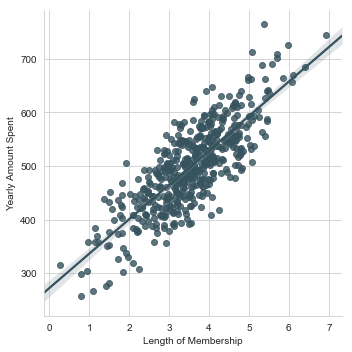

In [22]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=customers)

In [23]:
# It fits 

In [24]:
# Training and Testing the data 

In [7]:
y = customers['Yearly Amount Spent']
X = customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

In [26]:
#  model_selection.train_test_split from sklearn is used to split the data into training and testing sets.  test_size=0.3 and random_state=101

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [29]:
# The model is build an now it has to be trained

In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
lm = LinearRegression()

In [10]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [33]:
# printing out coeffcient of the model 

In [34]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [25.98154972 38.59015875  0.19040528 61.27909654]


In [13]:
# predicting the model 

Text(0, 0.5, 'Predicted Y')

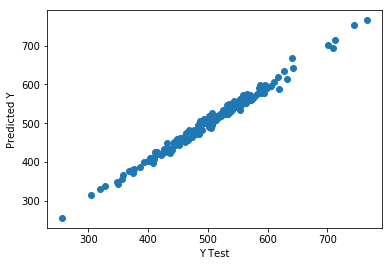

In [14]:
predictions = lm.predict( X_test)
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [15]:
# Model evaluation 

In [16]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 7.228148653430853
MSE: 79.81305165097487
RMSE: 8.933815066978656


In [17]:
# The model fit looks good. The next step is to see the distribution of the residuals

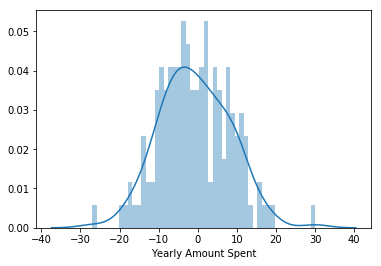

In [18]:
sns.distplot((y_test-predictions),bins=50);

In [19]:
# A bell curve is observed hence the residual is normally distributed 

In [20]:
# determing whhich factors affect the yearly spent amount most 

In [21]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


In [23]:
# We can interpret it as like this , once unit incerase in Avg. Session Length is associated with 25.98 dollars spent. Like wise one unit increase in Time on App is associated with 38.5 dollars spent. One unit increase in Time on Website is associated with 0.9 dollars spent. One unit Increase in Membership is associated with 61.2 dollars spent 

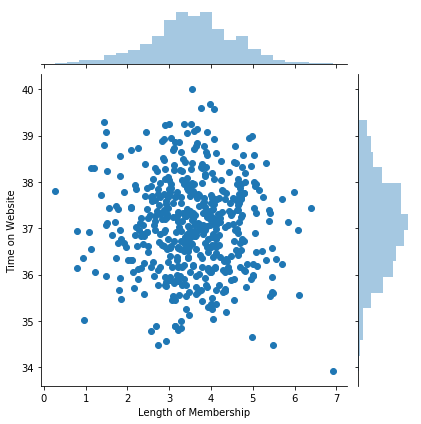

In [24]:
sns.jointplot(x='Length of Membership',y='Time on Website',data=customers)

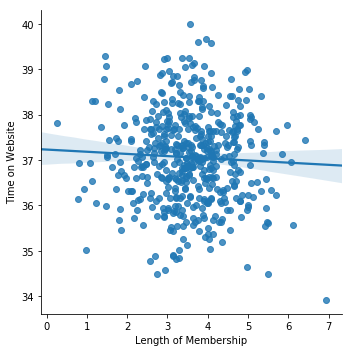

In [25]:
sns.lmplot(x='Length of Membership',y='Time on Website',data=customers)

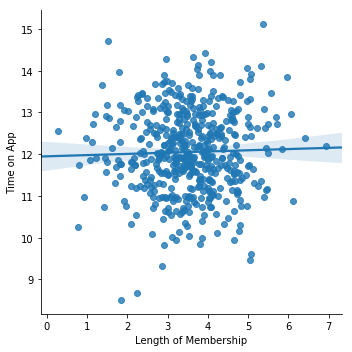

In [26]:
sns.lmplot(x='Length of Membership',y='Time on App',data=customers)

In [ ]:
# Hence, from the above analysis I can tell that  Menmebrship of the customers  is not dependent on aamount of Time spend on App or Web.Instead of focusing on their app or web development they should focus more on their product to attract customers.  